<a href="https://colab.research.google.com/github/Samuel442/Optimization/blob/main/cinematica_duas_configuracoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite a coordenada x do ponto A: 2
Digite a coordenada y do ponto A: 0
Digite a coordenada z do ponto A: 0
----------------------------
Digite a coordenada x do ponto B: 4
Digite a coordenada y do ponto B: 0
Digite a coordenada z do ponto B: 0
----------------------------
O cotovelo está para cima ou para baixo? Digite 'para cima' ou 'para baixo': para baixo
----------------------------
Ângulos das juntas para o ponto A em radianos: (-1.3502630658740633, 2.2459278597319283, -1.6810629572553133)
----------------------------
Ângulos das juntas para o ponto B em radianos: (-0.5367501772287113, 0.9581921787462742, -0.885089610518369)


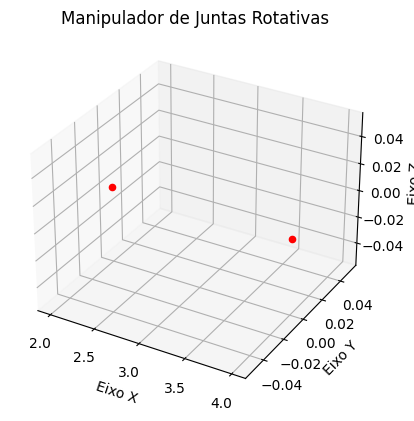

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Entrada dos pontos A pelo usuário
x_a = float(input("Digite a coordenada x do ponto A: "))
y_a = float(input("Digite a coordenada y do ponto A: "))
z_a = float(input("Digite a coordenada z do ponto A: "))
print("----------------------------")
# Entrada dos pontos B pelo usuário
x_b = float(input("Digite a coordenada x do ponto B: "))
y_b = float(input("Digite a coordenada y do ponto B: "))
z_b = float(input("Digite a coordenada z do ponto B: "))
print("----------------------------")
# estado do cotovelo
cotovelo = input("O cotovelo está para cima ou para baixo? Digite 'para cima' ou 'para baixo': ")

# Função para calcular a cinemática inversa
def calcular_cinematica_inversa(x, y, z, cotovelo):
    # Comprimentos dos elos
    L1 = 2.0
    L2 = 2.5

    # Cálculo do ângulo psi considerando a posição do cotovelo
    if cotovelo == 'para cima':
        psi = np.arccos((x**2 + y**2 + L1**2 - L2**2) / (2 * L1 * np.sqrt(x**2 + y**2)))
    else:
        psi = -np.arccos((x**2 + y**2 + L1**2 - L2**2) / (2 * L1 * np.sqrt(x**2 + y**2)))

    # Cálculo do ângulo teta1
    teta1 = np.arctan2(y, x) + psi

    # Cálculo da distância entre a base e o ponto no plano xy
    r = np.sqrt(x**2 + y**2)

    # Cálculo da altura do ponto em relação à base
    h = z - L1

    # Cálculo do ângulo teta2
    teta2 = np.arccos((x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2))

    # Cálculo do ângulo teta3
    phi = np.arctan2(h, r)
    teta3 = phi - (teta1 + teta2)

    return teta1, teta2, teta3

# Cálculo dos ângulos das juntas para os pontos A e B
juntas_a = calcular_cinematica_inversa(x_a, y_a, z_a, cotovelo) # armazena os ângulos da junta a
juntas_b = calcular_cinematica_inversa(x_b, y_b, z_b, cotovelo) # armazena os ângulos da junta b

# Exibição dos ângulos das juntas
print("----------------------------")
print("Ângulos das juntas para o ponto A em radianos:", juntas_a) # exibe os ângulos da junta a em radianos
print("----------------------------")
print("Ângulos das juntas para o ponto B em radianos:", juntas_b) # exibe os ângulos da junta b em radianos

# Função para plotar os pontos no espaço 3D
def plotar_pontos(pontos):
    fig = plt.figure()                               # Cria uma nova figura vazia para plotagem.
    ax = fig.add_subplot(111,                        # criando apenas um subplot na figura
                         projection='3d')            # Adiciona um subplot tridimensional
    ax.set_xlabel('Eixo X')                          # Define o rótulo do eixo x como "Eixo X"
    ax.set_ylabel('Eixo Y')                          # Define o rótulo do eixo y como "Eixo Y"
    ax.set_zlabel('Eixo Z')                          # Define o rótulo do eixo z como "Eixo Z
    ax.set_title('Manipulador de Juntas Rotativas')  # Define o título do gráfico

    for ponto in pontos:         # "ponto" recebe uma tupla que representa as coordenadas de um ponto no espaço tridimensional
        ax.scatter(ponto[0],     # Valor da coordenada x do ponto atual
                   ponto[1],     # Valor da coordenada y do ponto atual
                   ponto[2],     # Valor da coordenada z do ponto atual
                   c='r',        # Define a cor dos pontos como vermelho (r para red)
                   marker='o')   # Define o marcador dos pontos como uma esfera (o para circle)

    plt.show()

# Plotagem dos pontos A e B no espaço 3D
pontos = [(x_a, y_a, z_a), (x_b, y_b, z_b)] # atribui as duas tuplas que representa as coordenadas do ponto A e B
plotar_pontos(pontos)                       # chama a função de plot e passa os pontos

# cálculo s em relação ao pulso
# fórmulas de acordo com o desenvolvimento do livro texto CRAIG, J. J. Robótica . Pearson Education do Brasil, 3a ed, 2013